In [13]:
# Definición de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import MinMaxScaler  # Añadido para escalamiento
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


In [14]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [15]:
# Carga del conjunto de datos
df = pd.read_csv(filepath_or_buffer = "/home/darok/Documentos/Escuela/IEDC/uteq/Evalucion2/samsung.csv", parse_dates=['Date'], dayfirst=True)
df.head()
df# Información contenida en el dataframe
df.describe()

,Date,Close,Volume
count,2850,2850.000000,2.850000e+03
mean,2013-09-12 15:43:49.894736640,26611.305263,1.610505e+07
min,2008-01-02 00:00:00,8040.000000,0.000000e+00
25%,2010-10-25 06:00:00,16300.000000,1.021426e+07
50%,2013-09-02 12:00:00,25600.000000,1.359033e+07
75%,2016-07-26 18:00:00,30850.000000,1.960970e+07
max,2019-06-28 00:00:00,57220.000000,6.487345e+07
std,NaN,11991.608543,8.661794e+06


/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

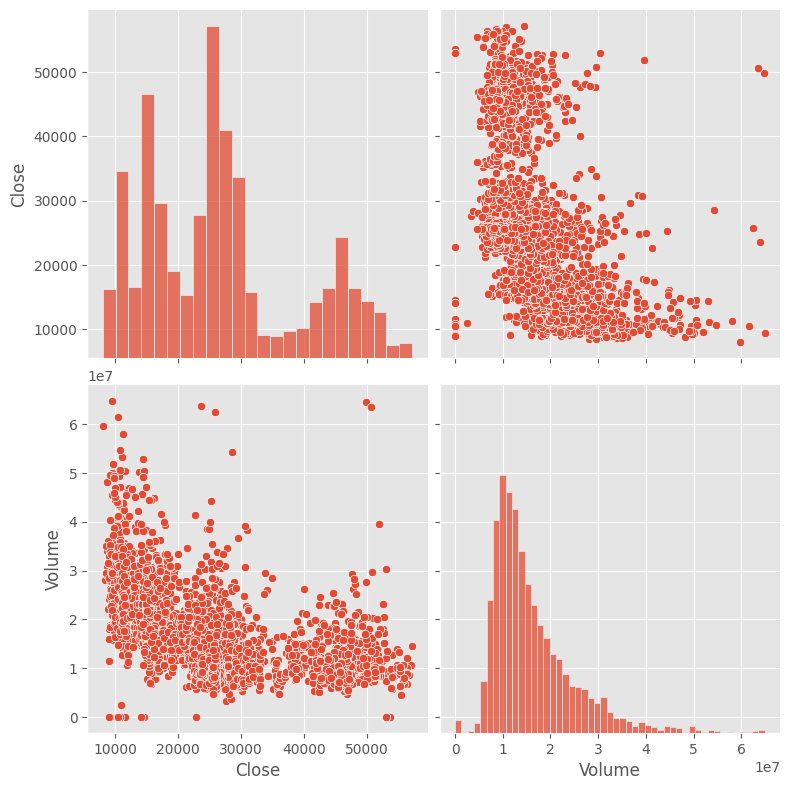

In [16]:
# Visualización combinada
sb.pairplot(df.dropna(), height=4, vars=["Close", "Volume"], kind='scatter')


In [17]:
# Definir entradas y escalar los datos
scaler = MinMaxScaler()  # Crear el objeto escalador
X = scaler.fit_transform(df[["Close", "Volume"]])  # Escalar los datos
X.shape

(2850, 2)

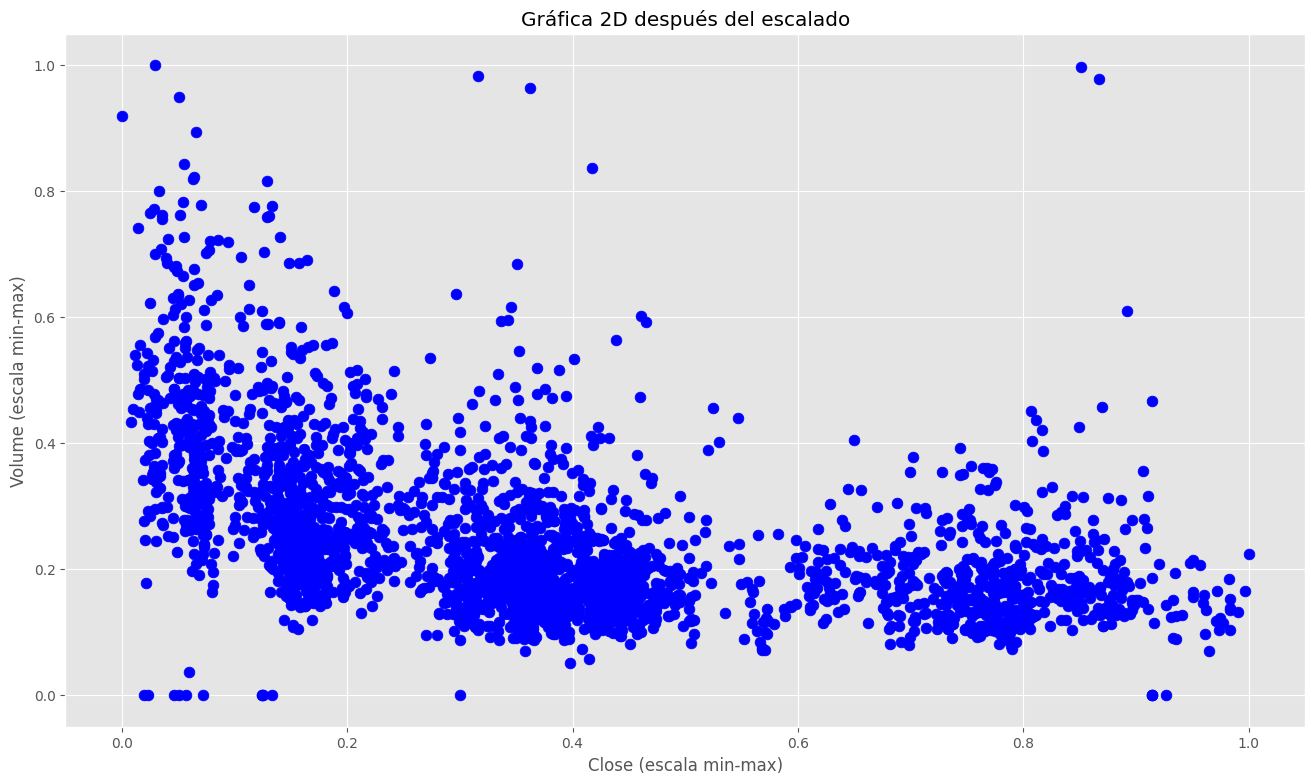

In [18]:
# Grafica 2D para representar categorías después del escalado
plt.scatter(X[:, 0], X[:, 1], c='blue', s=60)
plt.xlabel('Close (escala min-max)')
plt.ylabel('Volume (escala min-max)')
plt.title('Gráfica 2D después del escalado')
plt.show()

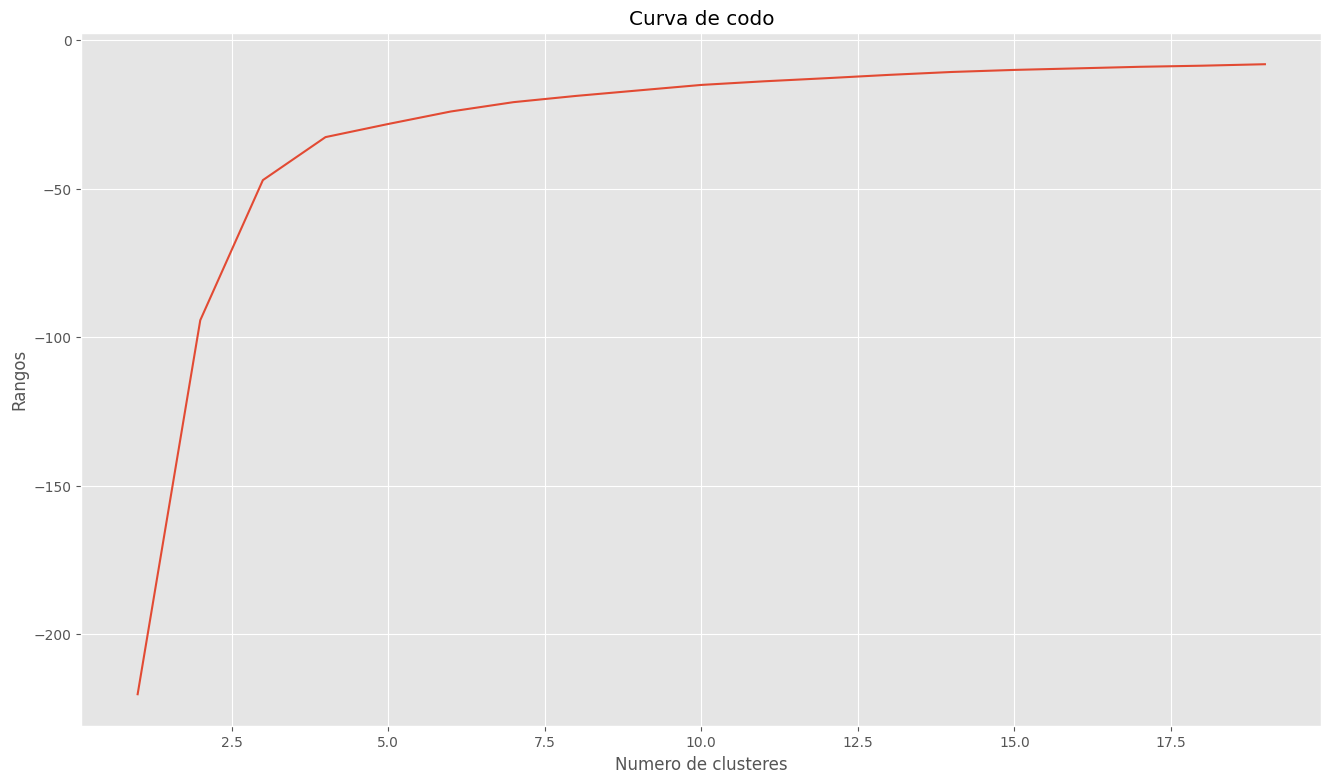

In [19]:
# Obtener valor de K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Numero de clusteres')
plt.ylabel('Rangos')
plt.title('Curva de codo')
plt.show()

In [20]:
#Ejecutar K-Means
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.77691609 0.18397818]
 [0.15361114 0.27284465]
 [0.38690092 0.18873368]
 [0.11726701 0.52846792]]


/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
# Predicción de clusteres
labels = kmeans.predict(X)

In [22]:
# Obteniendo los centroides del clúster
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])


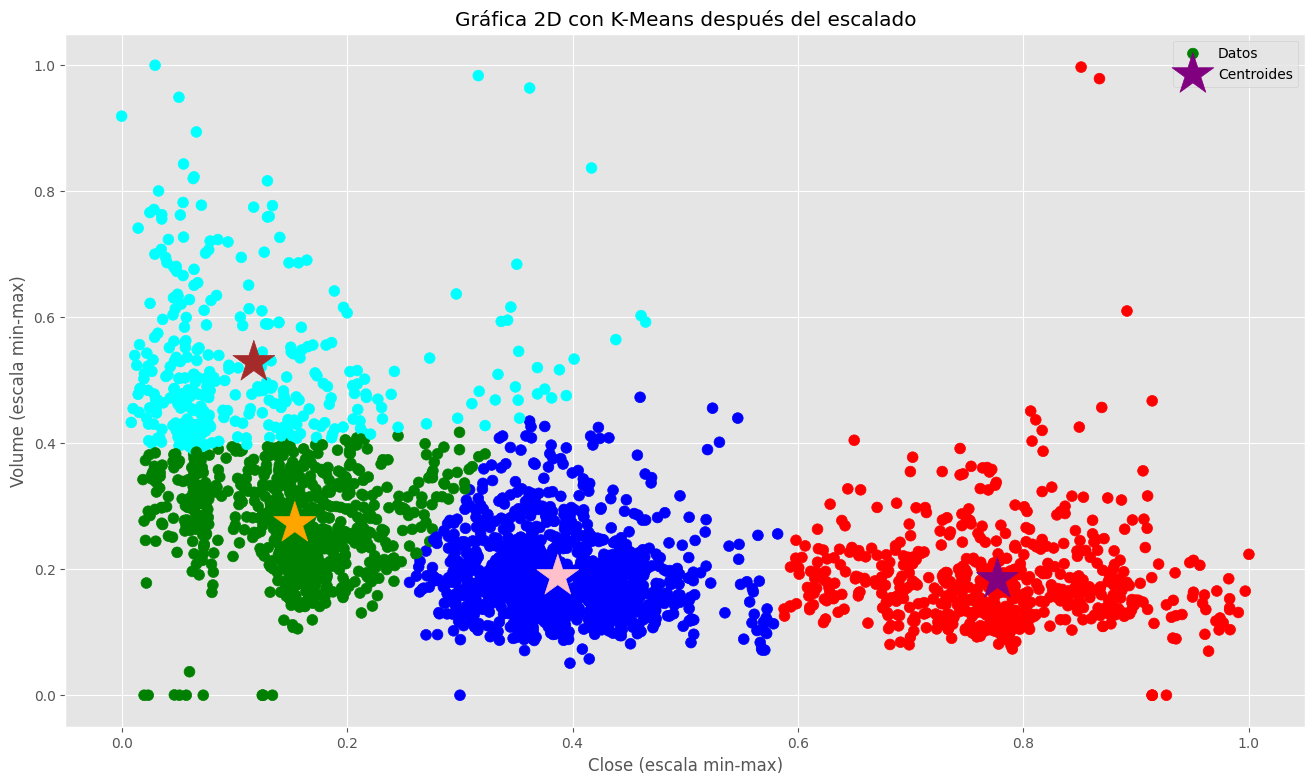

In [25]:
# Definir colores específicos para los centroides
colores_centroides = ['purple', 'orange', 'pink', 'brown']

# Gráfica 2D después del escalado y K-Means
plt.scatter(X[:, 0], X[:, 1], c=asignar, s=60, label='Datos')
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores_centroides, s=1000, label='Centroides')
plt.xlabel('Close (escala min-max)')
plt.ylabel('Volume (escala min-max)')
plt.title('Gráfica 2D con K-Means después del escalado')
plt.legend()
plt.show()

In [26]:
# Cantidad de muestras por cluster
copy = pd.DataFrame()
copy['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,600
1,green,738
2,blue,1184
3,cyan,328


In [27]:
# Nuevas muestras
X_new = np.array([[45.92, 57.74]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]
